# Fourier series examples

        fs_confused.ipynb
        2021.01.09

In [2]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:93% !important; }</style>"))

* [Fourier series graphing tool](https://www.mathsisfun.com/calculus/fourier-series-graph.html) <br>
* [Fourier series](https://www.mathsisfun.com/calculus/fourier-series.html)<br>


<img src="FS_001.JPG" width=600 height=100>
<img src="FS_002.JPG" width=300 height=10>


* If $f$ is periodic on $[X_s,X_e]$, then

$$
\begin{align}
f(x) \ & = \ \frac{A_0}{2} \ + \ \sum^\infty_{k=1} A_k\cos(\frac{2\pi k x}{X_e-X_s}) \ + \  B_k\sin(\frac{2\pi k x}{X_e-X_s}) \nonumber \\
A_k \ & = \ \frac{2}{X_e-X_s} \int^{X_e}_{X_s} f(x) \cos(\frac{2\pi k x}{X_e-X_s}) dx \nonumber \\
B_k \ & = \ \frac{2}{X_e-X_s} \int^{X_e}_{X_s} f(x) \sin(\frac{2\pi k x}{X_e-X_s}) dx \nonumber 
\end{align}
$$

write a function which given 
- discrete function f on x
- plots harmonics

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.cm import get_cmap

def get_x_dx_L(Xs, Xe, N):
    L = Xe - Xs
    dx =L/N
    x = np.arange( Xs, Xe, dx )
    return x, dx, L


def get_coef_A(k, f, x, dx, Xs, Xe):
    return (2/(Xe-Xs))*np.dot(f, np.cos(k*x))*dx

def get_coef_B(k, f, x, dx, Xs, Xe):
    return (2/(Xe-Xs))*np.dot(f, np.sin(k*x))*dx

def get_stats(d):
    return [np.nanmin(d), np.nanmean(d), np.nanmedian(d), np.nanmax(d), np.nanstd(d)]
# get_stats([1,2,3])
# np.where(np.abs([1,2,3])> 0.9)

def fs_harmonic(k, Xs, Xe, dx, x, f ):
    Ak = get_coef_A(k, f, x, dx, Xs, Xe)
    Bk = get_coef_B(k, f, x, dx, Xs, Xe)
    L = Xe-Xs
    fsk = Ak*np.cos(2*np.pi*k*x/L) + Bk*np.sin(2*np.pi*k*x/L) 
    if k==0:
        fsk = 2*fsk
    return fsk

In [18]:
def get_x_dx_L_v2(Xs, Xe, N):
    x=[]
    
    #     https://en.wikipedia.org/wiki/Chebyshev_nodes
    for k in range(N):
        k=k+1
        xk = (Xs+Xe)/2  + (Xe-Xs)/2*np.cos(  (2*k-1)*np.pi/(2*N)  )
        x.append(xk)
    
    L = Xe - Xs
    dx =L/N
#     x = np.arange( Xs, Xe, dx )
    return np.array(x), dx, L

x,dx,L = get_x_dx_L_v2(-10,10,4)
x

array([ 9.23879533,  3.82683432, -3.82683432, -9.23879533])

In [4]:
def my_function(x):
    return x**3



#     return lambda x: x**2

def print_my_func(f=my_function):
    res = f(4)
    print(res)

print_my_func(f=my_function)
# f = my_funciton(x[:10])
# print(f)

64


In [5]:
import numpy as np

def foo(f, fstr, x):
    print(fstr, f(x))
    
foo(f = lambda x: x**2, 
    fstr='squares', 
    x=np.array([-4,-3,-2,-1,0,1,2,3]) )

foo(f = lambda x: x**3, fstr='cubes', x=np.array([1,2,3]) )
foo(f = lambda x: x**3+x**2+5*x-100*x, fstr='poly', x=np.array([-2,-1,0,1,2,3]) )


squares [16  9  4  1  0  1  4  9]
cubes [ 1  8 27]
poly [ 186   95    0  -93 -178 -249]


In [23]:
Xs, Xe = -np.pi, np.pi
Npoints = 200
Nharmonics = 100
# f = x**2; fstr='parabola'
# f = x**3; fstr='cube'
def plot_fourier_seriers_approximation( Xs, Xe,
                                       Npoints=200, 
                                       func = lambda x: x**3, 
                                       fstr = 'cube', 
                                       Nharmonics=100,
                                      legend_loc= 'upper left',
                                      labels=['k=0-100']):
#     x, dx, L = get_x_dx_L_v2( Xs, Xe, N=Npoints )
    x, dx, L = get_x_dx_L( Xs, Xe, N=Npoints )
    f = func(np.array(x))

    fs = np.zeros(Npoints)
    for k in range(Nharmonics):
        fs = fs + fs_harmonic(k=k, Xs=-np.pi, Xe=-np.pi+L,dx=dx, x=x, f=f)

    plt.rcParams['figure.figsize'] = [12, 3]
    plt.rcParams.update({'font.size': 13})
    fig, ax = plt.subplots()
    ax.plot(   x, f,'-',color='r',LineWidth=2, label='true f')
    ax.scatter(x, fs, label=labels[0])

    ax.grid(True)   
    cmap = get_cmap('tab10')
    colors = cmap.colors
    ax.set_prop_cycle(color=colors)
    ax.legend(loc=legend_loc)
    # legend = ax.legend(loc='upper right', shadow=True, fontsize='x-large')
    # # Put a nicer background color on the legend.
    # legend.get_frame().set_facecolor('C0')
    [Lr, Xsr, Xer] = np.round([L, Xs, Xe],1)
    
    title_str = fstr + f', Np={Npoints}, Nh={Nharmonics}, L={Lr}, Xs={Xsr}, Xe={Xer}'
    plt.title( title_str)
    plt.show()
    
    return 1

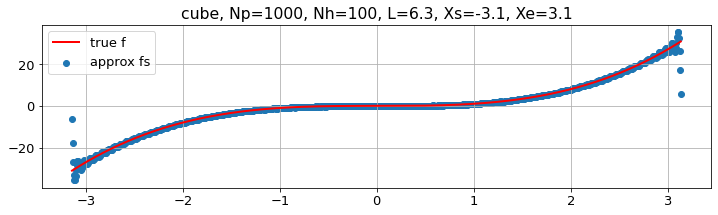

1

In [24]:
plot_fourier_seriers_approximation( Xs=-np.pi, Xe=np.pi,
                                       Npoints=1000, 
                                       func = lambda x: x**3, 
                                       fstr = 'cube', 
                                       Nharmonics=100,
                                      legend_loc= 'upper left',
                                      labels=['approx fs'])

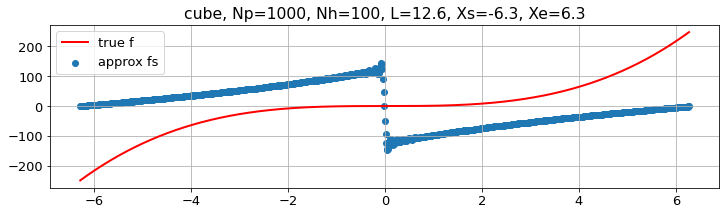

1

In [25]:
k=2
plot_fourier_seriers_approximation( Xs=-k*np.pi, Xe=k*np.pi,
                                       Npoints=1000, 
                                       func = lambda x: x**3, 
                                       fstr = 'cube', 
                                       Nharmonics=100,
                                      legend_loc= 'upper left',
                                      labels=['approx fs'])

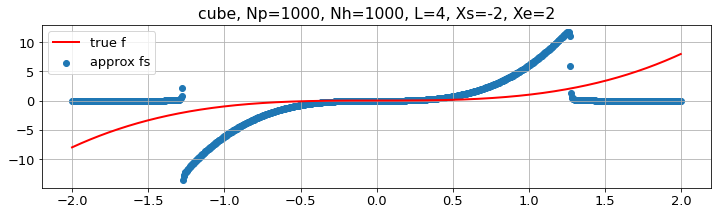

1

In [26]:
plot_fourier_seriers_approximation( Xs=-2, Xe=2,
                                       Npoints=1000, 
                                       func = lambda x: x**3, 
                                       fstr = 'cube', 
                                       Nharmonics=1000,
                                      legend_loc= 'upper left',
                                      labels=['approx fs'])

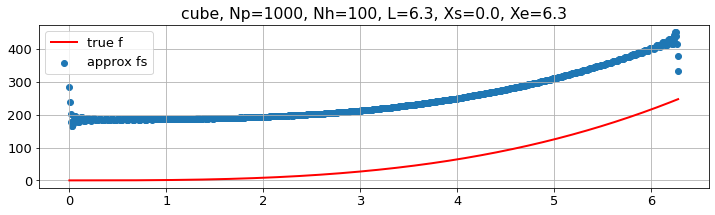

1

In [27]:
plot_fourier_seriers_approximation( Xs=0, Xe=2*np.pi,
                                       Npoints=1000, 
                                       func = lambda x: x**3, 
                                       fstr = 'cube', 
                                       Nharmonics=100,
                                      legend_loc= 'upper left',
                                      labels=['approx fs'])

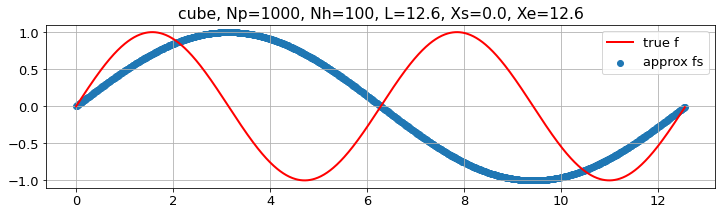

1

In [103]:
plot_fourier_seriers_approximation( Xs=0, Xe=4*np.pi,
                                       Npoints=1000, 
                                       func = lambda x: np.sin(x), 
                                       fstr = 'cube', 
                                       Nharmonics=100,
                                      legend_loc= 'upper right',
                                      labels=['approx fs'])

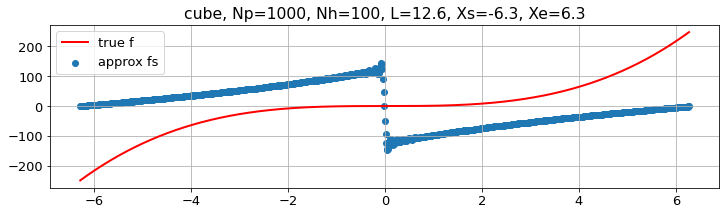

1

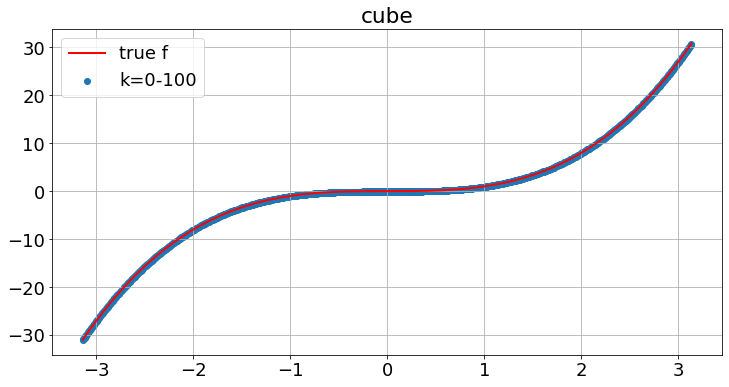

In [30]:
L = 2*np.pi
x, dx, L = get_x_dx_L( Xs=-np.pi, Xe=-np.pi+L, N=Npnts)
f = x**2; fstr='parabola'
f = x**3; fstr='cube'

fs = np.zeros(len(x))
for k in range(500):
    fs = fs + fs_harmonic(k=k, Xs=-np.pi, Xe=-np.pi+L,dx=dx, x=x, f=f)
    
plt.rcParams['figure.figsize'] = [12, 6]
plt.rcParams.update({'font.size': 18})
fig, ax = plt.subplots()
ax.plot(   x, f,'-',color='r',LineWidth=2, label='true f')
ax.scatter(x, fs, label='k=0-100')

ax.grid(True)   
cmap = get_cmap('tab10')
colors = cmap.colors
ax.set_prop_cycle(color=colors)

# ax.legend(loc='upper right')
ax.legend(loc='upper left')
# legend = ax.legend(loc='upper right', shadow=True, fontsize='x-large')

# # Put a nicer background color on the legend.
# legend.get_frame().set_facecolor('C0')
plt.title( fstr)
plt.show()

In [ ]:
x = np.arange( 0, 4*np.pi, dx )
y0 = 4/np.pi*np.sin(x)
y1 = 4/(3*np.pi)*np.sin(3*x)
y2 = 4/(5*np.pi)*np.sin(5*x)
            
plt.rcParams['figure.figsize'] = [12, 6]
plt.rcParams.update({'font.size': 18})
fig, ax = plt.subplots()
# ax.plot(x, y0,'-',color='r',LineWidth=2)
ax.scatter(x, y0, label='k=0')
ax.scatter(x, y1, label='k=1')
ax.scatter(x, y2, label='k=2')

ax.scatter(x, y0+y1+y2, c='r',label='k:0-3')

ax.grid(True)   
cmap = get_cmap('tab10')
colors = cmap.colors
ax.set_prop_cycle(color=colors)

ax.legend(loc='upper right')
# legend = ax.legend(loc='upper right', shadow=True, fontsize='x-large')

# # Put a nicer background color on the legend.
# legend.get_frame().set_facecolor('C0')
plt.title( ' 3 sine waves and their sum')
plt.show()

In [ ]:
N=100
for k in range(N):
    y_tmp = 4/((2*k+1)*np.pi)*np.sin((2*k+1)*x)
    if k==0:
        y = y_tmp
    else:
        y = y + y_tmp
        
plt.rcParams['figure.figsize'] = [12, 6]
plt.rcParams.update({'font.size': 18})
fig, ax = plt.subplots()
ax.plot(x, y,'-',color='b',LineWidth=2, label='k:0-100')
ax.scatter(x, y, label='k:0-100', color='r')
ax.legend(loc='upper right')
plt.title('Sum of 100 sine waves')

ax.grid(True)   
plt.show()

In [ ]:
plt.rcParams['figure.figsize'] = [20, 6]
plt.rcParams.update({'font.size': 18})
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.suptitle('Horizontally stacked subplots')
ax1.plot(x, y)
ax2.plot(x, -y)